Contents of this notebook were partially prepared by Dr. Edward Raff (2019)

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## First example is classification on Iris Dataset

In [5]:
data = datasets.load_iris()

In [6]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [7]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
train_df, test_df= train_test_split(iris_df)  #default for shuffle is True
print(len(train_df),len(test_df))
#help(train_test_split)
display(train_df)

112 38


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
2,4.7,3.2,1.3,0.2,0.0
117,7.7,3.8,6.7,2.2,2.0
148,6.2,3.4,5.4,2.3,2.0
26,5.0,3.4,1.6,0.4,0.0
19,5.1,3.8,1.5,0.3,0.0
...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,0.0
92,5.8,2.6,4.0,1.2,1.0
12,4.8,3.0,1.4,0.1,0.0
90,5.5,2.6,4.4,1.2,1.0


In [10]:
tree = DecisionTreeClassifier(max_depth=100)
#DecisionTreeClassifier(criterion='entropy')   #default criterion is 'gini'
#help(DecisionTreeClassifier)
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(max_depth=100)

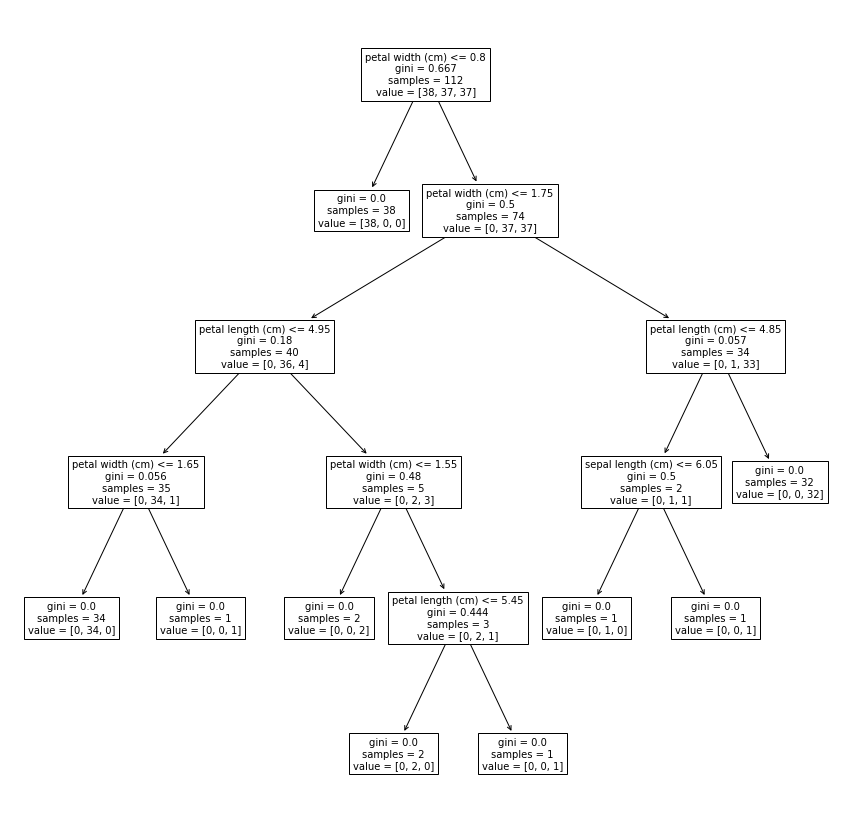

In [11]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

Accuracy on training set?

In [12]:
sum(tree.predict(train_df.drop('target',axis=1))==train_df['target'])

112

We are not surprised by 100% accuracy on the training set, because we did not limit the tree depth or min no of samples in a split.

What about the accuracy on test set?

In [13]:
sum(tree.predict(test_df.drop('target',axis=1))==test_df['target'])

37

In [14]:
confusion_matrix(tree.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]])

In [15]:
tree.feature_importances_
#The feature importances (in the given order). 
#The higher, the more important the feature.
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

array([0.01339392, 0.        , 0.06873297, 0.9178731 ])

In [16]:
mat=tree.decision_path(test_df.iloc[14].drop('target').values.reshape(1,-1))
print(test_df.iloc[14].drop('target'))
print(mat)

sepal length (cm)    5.6
sepal width (cm)     2.9
petal length (cm)    3.6
petal width (cm)     1.3
Name: 64, dtype: float64
  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [17]:
tree.predict(test_df.drop('target',axis=1))==test_df['target']

87      True
75      True
81      True
21      True
107     True
62      True
49      True
46      True
124     True
125     True
40      True
138    False
47      True
104     True
64      True
144     True
53      True
95      True
55      True
105     True
6       True
89      True
14      True
3       True
29      True
80      True
28      True
136     True
33      True
110     True
149     True
99      True
67      True
109     True
66      True
146     True
31      True
134     True
Name: target, dtype: bool

## Regression on Boston House Dataset

In [18]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
housing_train_df, housing_test_df = train_test_split(housing_df)

In [19]:
housing_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5.0,403.0,14.7,353.89,6.43,24.3
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5
222,0.62356,0.0,6.20,1.0,0.507,6.879,77.7,3.2721,8.0,307.0,17.4,390.39,9.93,27.5


In [20]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [21]:
mean_squared_error(tree_reg.predict(housing_train_df.drop('target',axis=1)), housing_train_df['target'])

10.61744287564357

In [22]:
mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])

24.278904702922553

In [23]:
tree_reg.score(housing_train_df.drop('target',axis=1), housing_train_df['target'])

0.8733624233357318

In [24]:
tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])

0.7168665437240037

Remember, score increases with a better model, whereas MSE decreases.

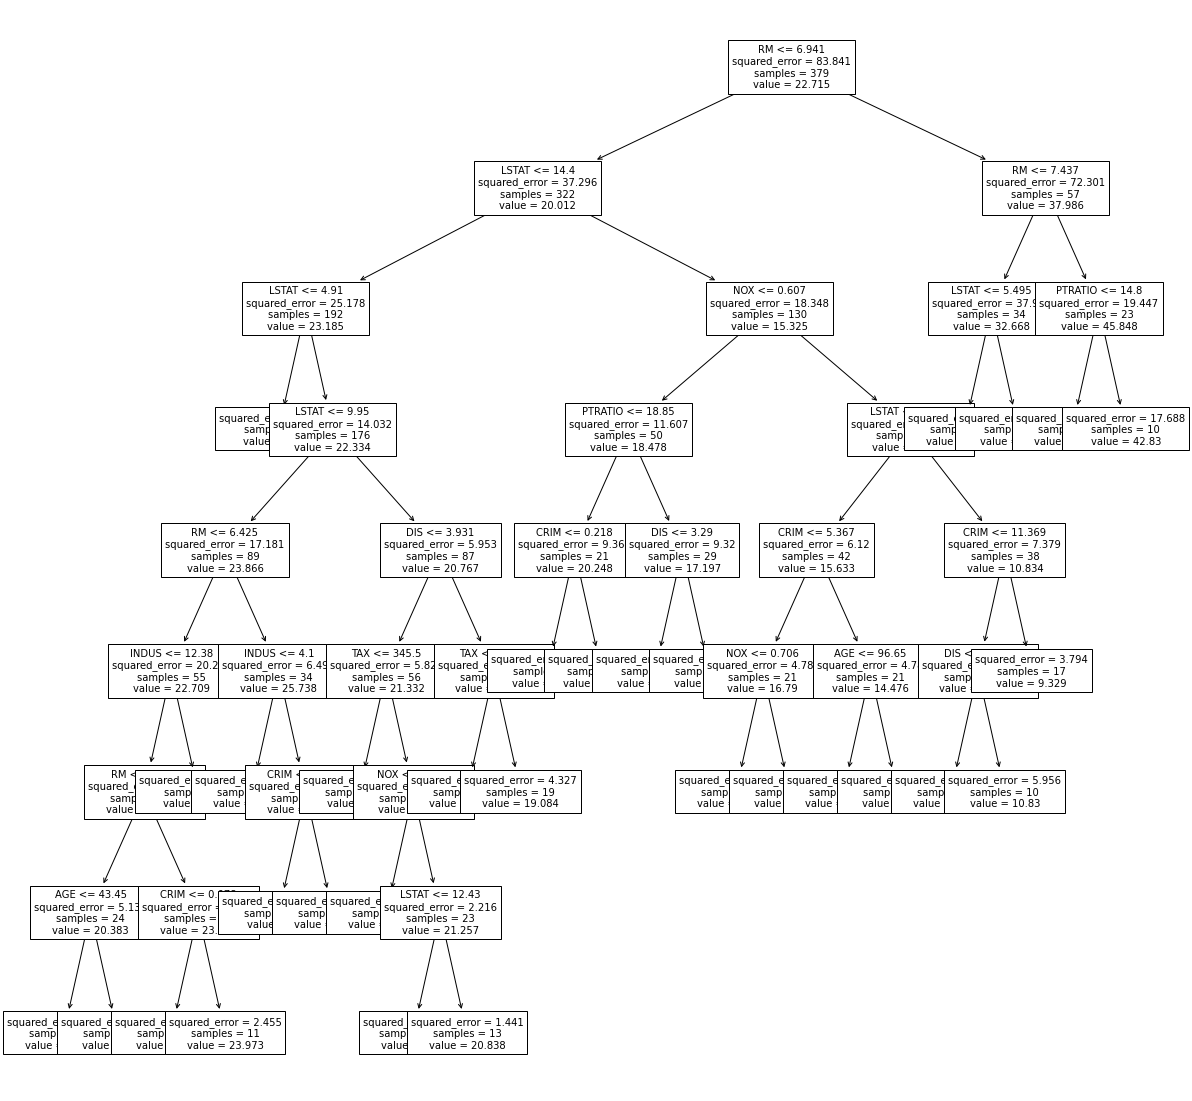

In [25]:
pyplot.figure(figsize=(20,20))
tr.plot_tree(tree_reg, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

### Regularization in DTs
In DTs, instead of incorporating penalties into the cost function, overfitting is controlled with a variety of hyperparameters such as maximum tree depth (`max_depth`) or number of samples needed for a split to be possible (`min_samples_split`).

You'll need to follow best practices for determining the values of these hyperparameters.

Let's check our last models performance on test set for varying (`max_depth`).

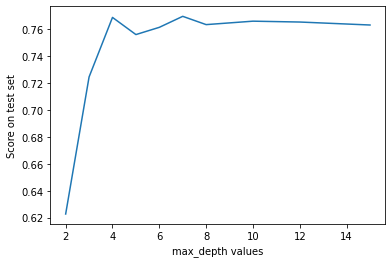

In [26]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
errors = np.zeros(10)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=5)
    tree_reg.fit(housing_train_df.drop('target',axis=1),housing_train_df['target'])
    #u=mean_squared_error(tree_reg.predict(housing_test_df.drop('target',axis=1)), housing_test_df['target'])
    u=tree_reg.score(housing_test_df.drop('target',axis=1), housing_test_df['target'])
    errors[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

## Another Regression Example with Regularization

This time let's use one feature and visualize the fitting model.

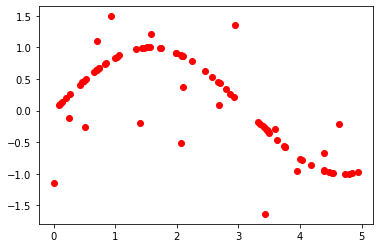

In [27]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)  #spreads 80 random points from [0,1] to [0,5] range.
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  # this line adds noise

pyplot.plot(X,y, 'ro')
pyplot.show()

Lets fit a DT Regressor:

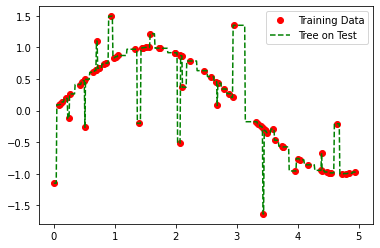

In [28]:
X_testvals = np.arange(0,5,0.01).reshape(-1,1)

tree=DecisionTreeRegressor(criterion='squared_error') #, max_depth=3) #squared_error is actually default value
dtr_yhat = tree.fit(X,y).predict(X_testvals)
#help(DecisionTreeRegressor())
pyplot.plot(X,y, 'ro')
pyplot.plot(X_testvals, dtr_yhat, 'g--')
pyplot.legend(['Training Data', 'Tree on Test'], loc='upper right')
pyplot.show()

It looks like an 'overfit'. Also you can see the tree nodes below. Lets try to limit depth of the tree to 3.

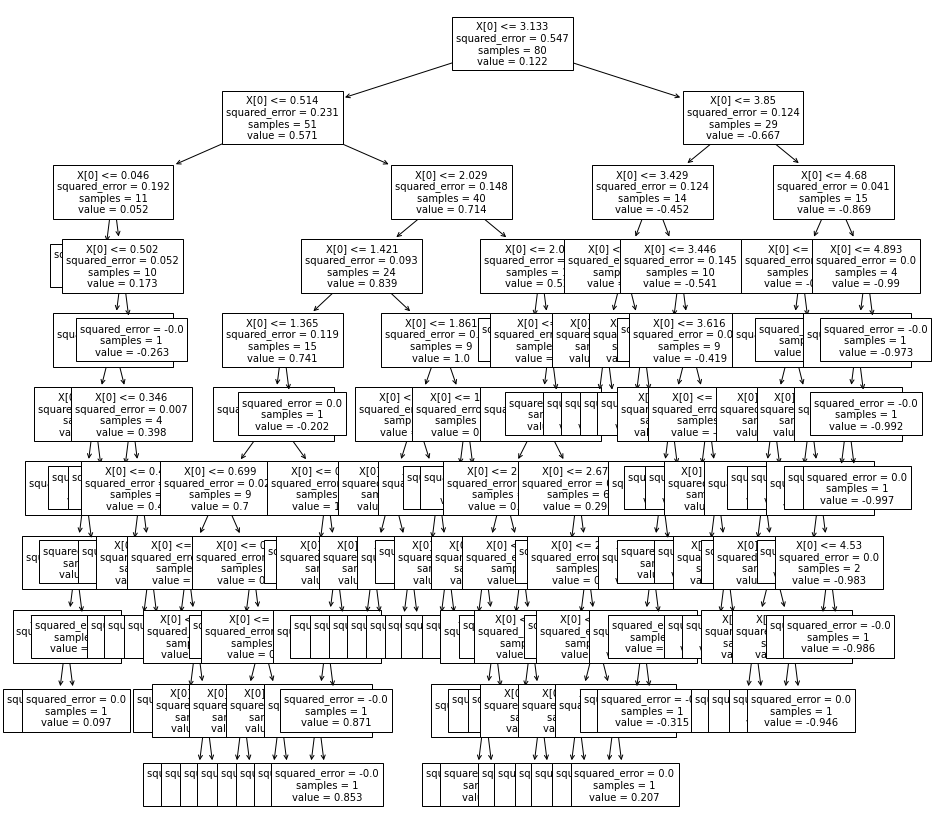

In [29]:
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, fontsize=10)
pyplot.show()

# Homework #3 (due 2nd of July, 11:59 PM):

### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes).
- Use box plots to look at the data. 
- Create a training and test set (with shuffling).
- Train a decision tree classifier using the training set.
- What are the top 5 most important (discriminative) features?
- Train a logistic regression model using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.

### Part 2)

- Use the provided *winequality_white.csv* as your data. Last column (quality) is the target variable.
- Do not forget to shuffle and split (Train/test) your data.
- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.


# **Q1**

In [30]:
#loading the cancer dataset

cancer_data= datasets.load_breast_cancer()
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [31]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [32]:
#converting the cancer data to dataframe

cancer_df = pd.DataFrame(data=np.c_[cancer_data['data'], cancer_data['target']],columns= list(cancer_data['feature_names']) + ['target'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [33]:
cancer_df[cancer_df['target']==0].describe()  #Malignant

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,0.0


In [34]:
cancer_df[cancer_df['target']==1].describe()  #benign

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.0
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,1.0
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,1.0
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,1.0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


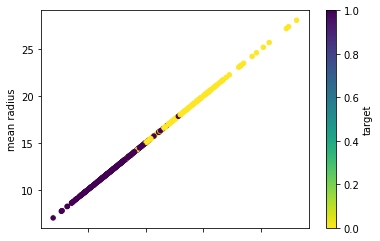

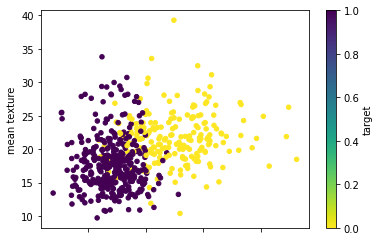

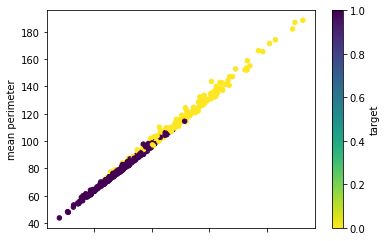

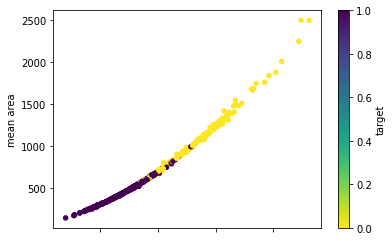

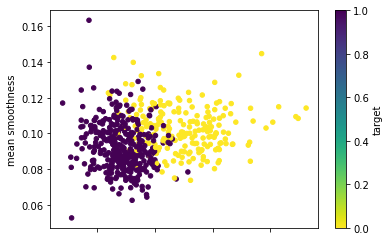

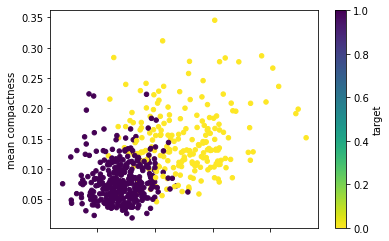

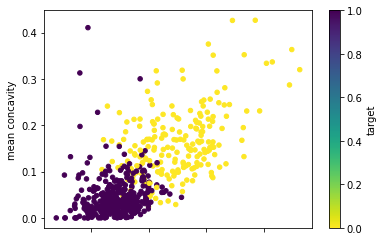

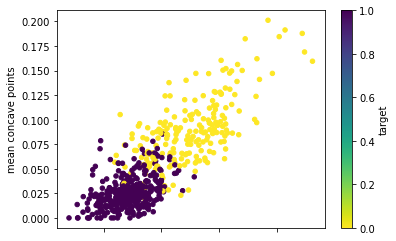

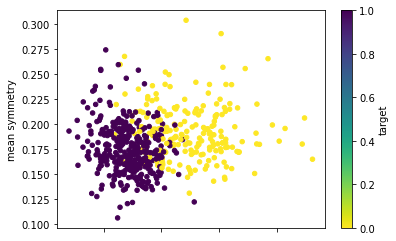

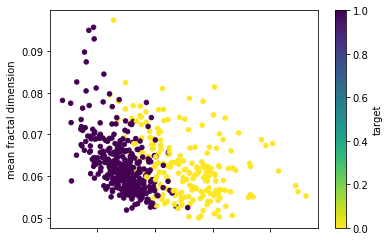

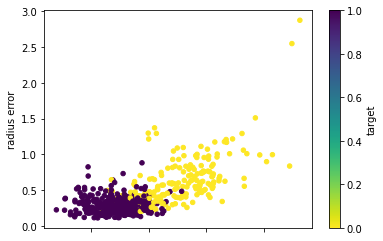

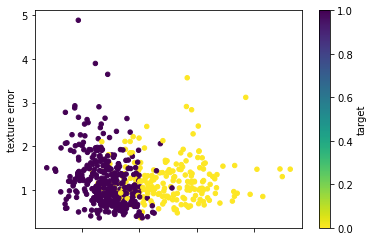

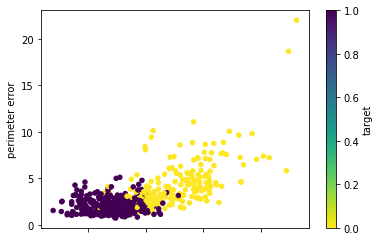

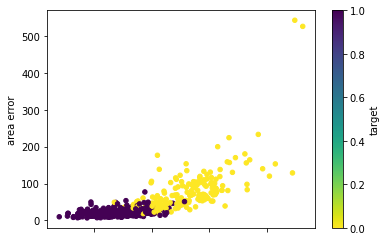

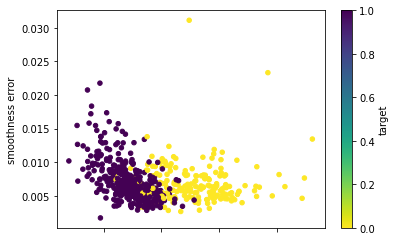

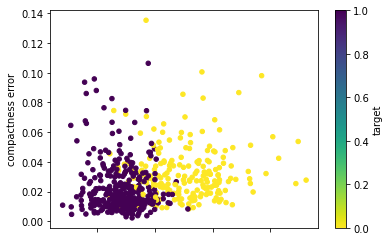

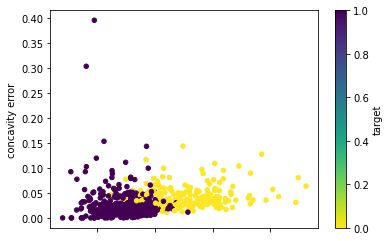

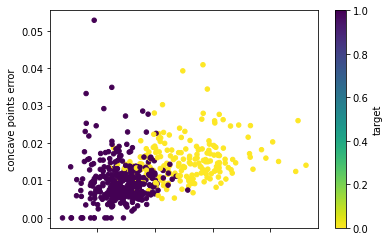

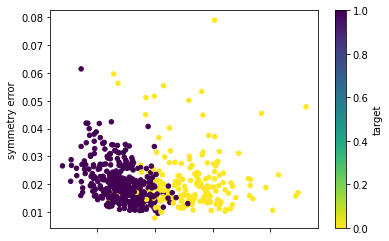

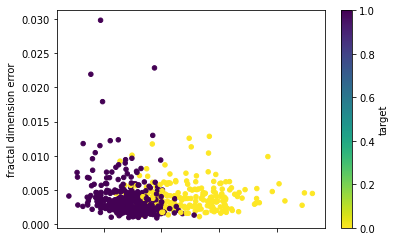

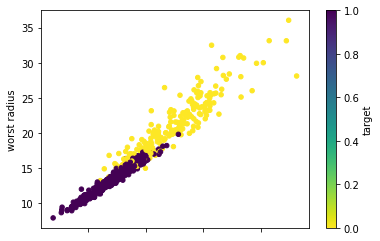

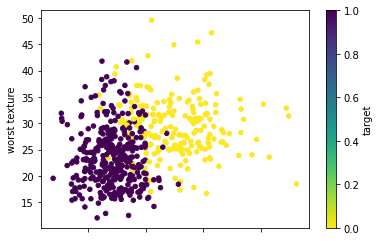

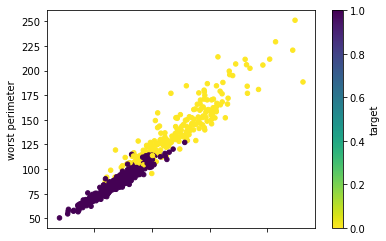

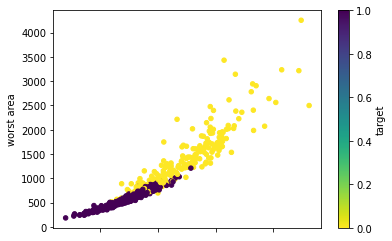

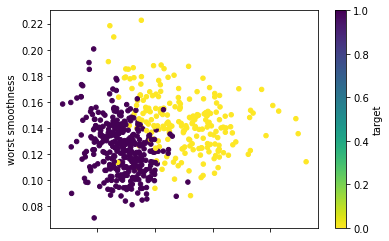

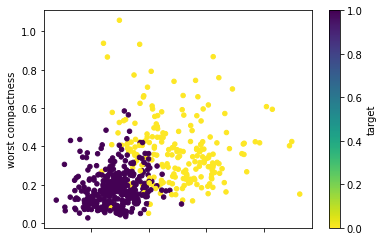

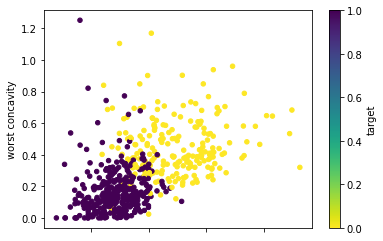

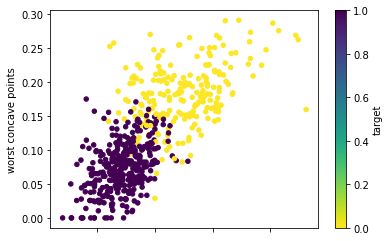

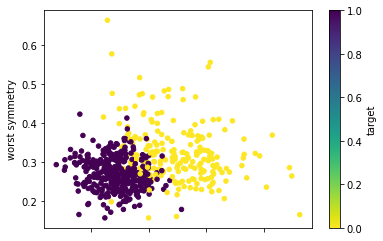

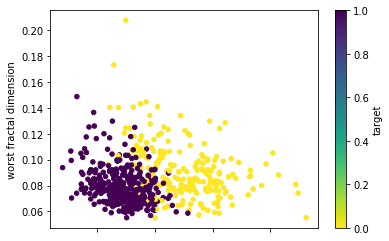

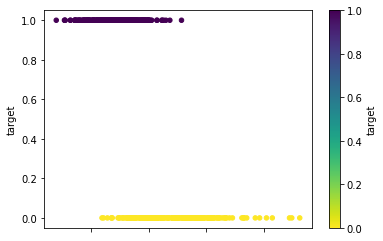

In [35]:
#Scatter plots for the cancer data

for i in cancer_df.columns:
  cancer_df.plot.scatter(x='mean radius',y=i,s=20,c='target',colormap='viridis_r')    

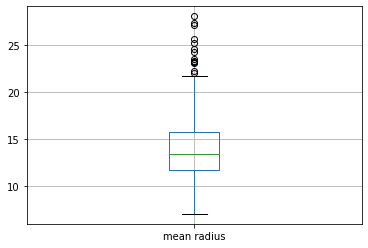

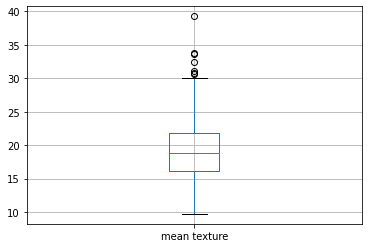

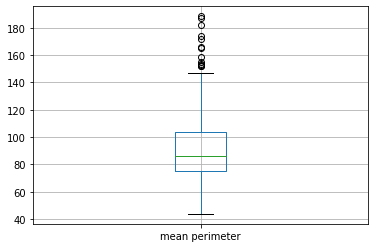

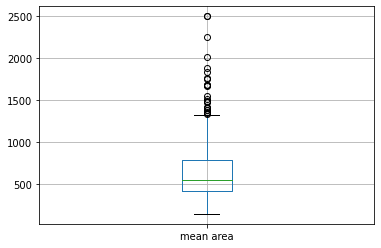

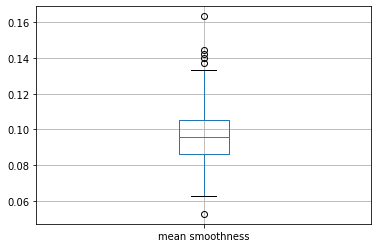

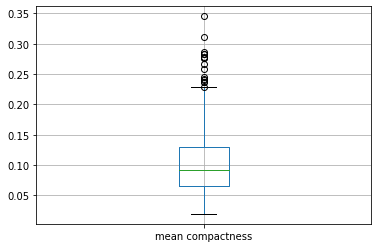

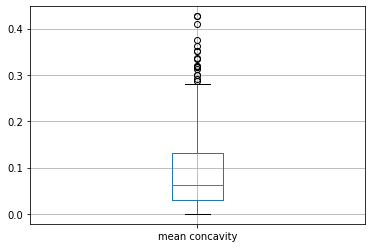

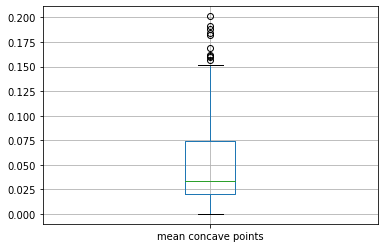

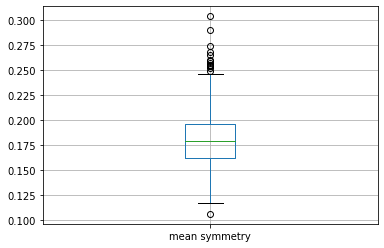

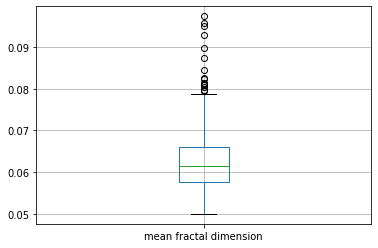

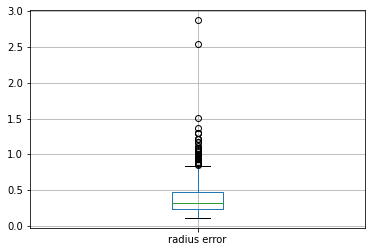

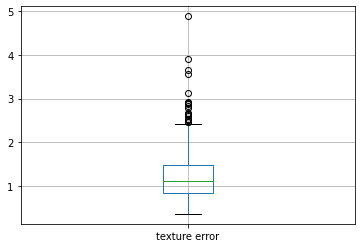

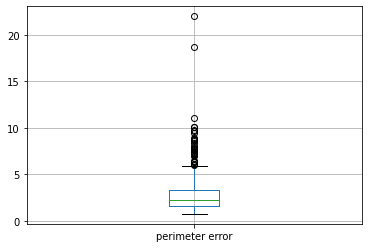

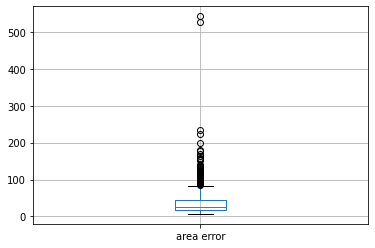

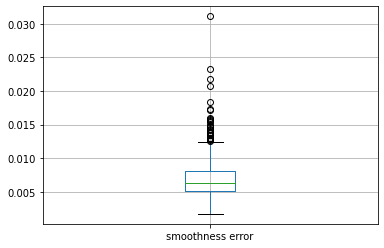

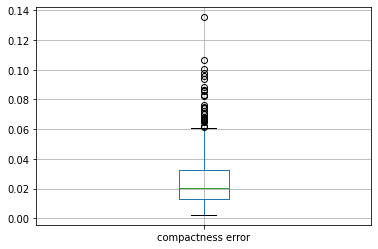

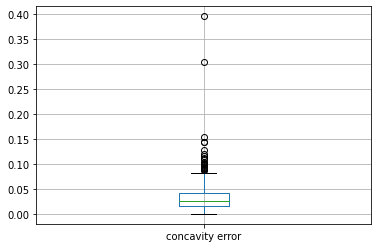

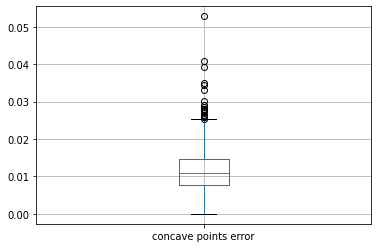

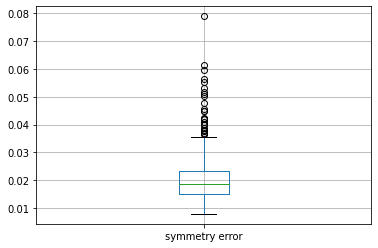

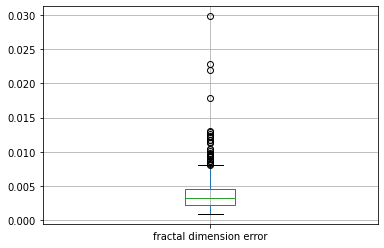

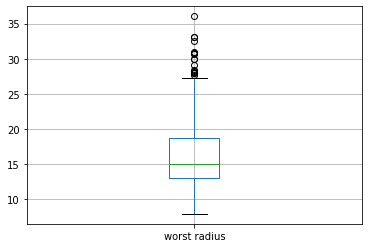

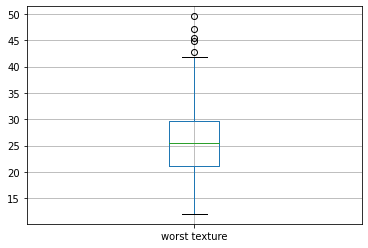

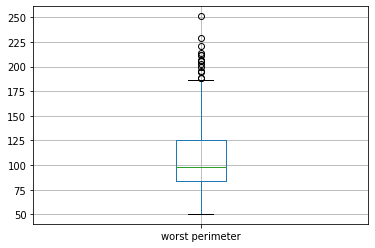

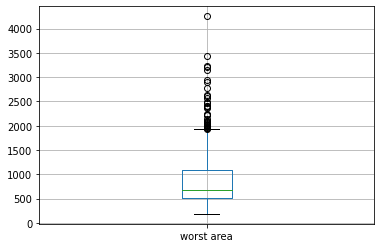

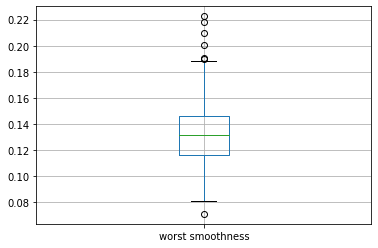

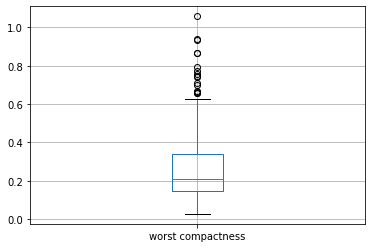

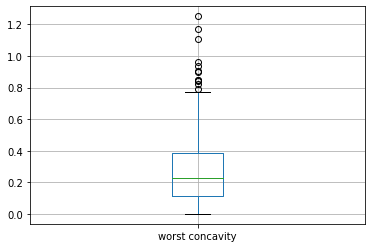

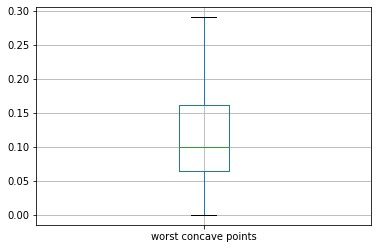

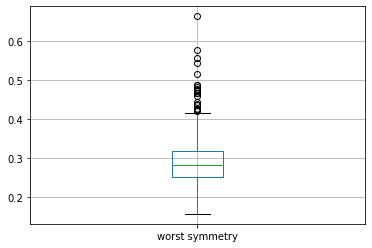

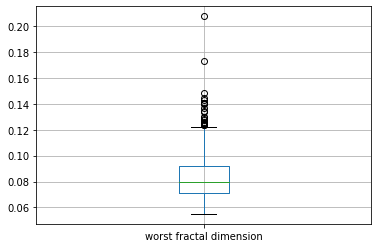

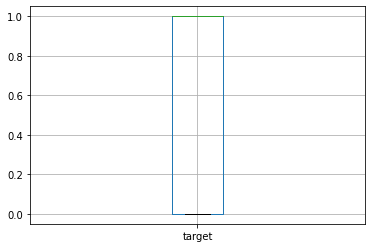

In [36]:
#box plot for all the features in the cancer data (to check outliers)

for column in cancer_df:
    pyplot.figure()
    cancer_df.boxplot([column])
    pyplot.show()

In [37]:
#Assigning the input and output features for the model.

X = cancer_df.drop(['target'], axis=1)
y = cancer_df['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [38]:
#Splitting the data into train & test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(398, 30)
(171, 30)
(398,)
(171,)


In [39]:
# Building a Decision Tree Model

DT_cls = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
DT_cls.fit(X_train,y_train)
y_pred= DT_cls.predict(X_test)
print("training accuracy is",DT_cls.score(X_train,y_train))
print("testing accuracy is",DT_cls.score(X_test,y_test))


training accuracy is 0.9447236180904522
testing accuracy is 0.9415204678362573


In [40]:
#model performance using confusion matrix

CM= confusion_matrix(y_pred,y_test)
CM_df = pd.DataFrame(CM,
                     index = ['Malignant_act','benign_act'], 
                     columns = ['Malignant_pred','benign_pred'])
CM_df

,Malignant_pred,benign_pred
Malignant_act,56,3
benign_act,7,105


In [41]:
#feature selection- the 5 most important features based on chi-square scores using selectKbest

from sklearn.feature_selection import SelectKBest,chi2

select = SelectKBest(score_func=chi2, k=5)                #using selectKBest to find the top 5 important features.
z = select.fit_transform(X, y)
print("After selecting best 5 features:", z.shape)


filter = select.get_support()
features = np.array(X.columns.tolist())
 
print("Selected best features:")
print(features[filter])                #printing the top 5 features

X_filtered = X.iloc[:,filter]          #selecting only the top features as input for the model.

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_filtered, y, test_size=0.3, random_state= 42)   #splitting the data into train & test
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

DT_cls1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)    #Building a decision tree classifer using top 5 features for predicting target.
DT_cls1.fit(X_train1,y_train1)
y_pred1= DT_cls1.predict(X_test1)
print("training accuracy using Decision Tree classifier is",DT_cls1.score(X_train1,y_train1),"\n")
print("testing accuracy using Decision Tree classifier is",DT_cls1.score(X_test1,y_test1),"\n")


After selecting best 5 features: (569, 5)
Selected best features:
['mean perimeter' 'mean area' 'area error' 'worst perimeter' 'worst area']
(398, 5)
(171, 5)
(398,)
(171,)
training accuracy using Decision Tree classifier is 0.949748743718593 

testing accuracy using Decision Tree classifier is 0.9473684210526315 



In [42]:
# Logistic Regression using the 5 most important features

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_filtered, y, test_size=0.2, random_state= 1)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)
print("training accuracy using logistic regression is",logreg.score(X_train2,y_train2),'\n')
print("testing accuracy using logistic regression is",logreg.score(X_test2,y_test2),'\n')


(455, 5)
(114, 5)
(455,)
(114,)
training accuracy using logistic regression is 0.9472527472527472 

testing accuracy using logistic regression is 0.9122807017543859 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## *Based on test data score of Decision tree & Logistic regression model's, Decision Tree Classifier has performed better on the testing data with the accuracy of 94.7%.*

# **Q2**

### ***Please upload the "winequality_white.CSV" file and execute the below code.***

In [43]:
winequality_df = pd.read_csv("winequality_white.csv", delimiter=';')    #loading the winequality_white data to dataframe

In [44]:
winequality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
winequality_df.describe()    #checking the stats of the wine data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [46]:
#Feature Selection & selecting the best paramters based on testing accuracy.

from sklearn.metrics import accuracy_score

#assigning the inputs & output for the model
X3= winequality_df.drop('quality',axis=1)    
y3= winequality_df['quality']

#select the best features for the model
select = SelectKBest(score_func=chi2, k=5)
z3 = select.fit_transform(X3, y3)
print("After selecting best k features:", z3.shape)


filter1 = select.get_support()
features = np.array(X3.columns.tolist())
 
print("Selected best features:")
print(features[filter1])

X_filtered1 = X3.iloc[:,filter1]    #assigning only the selected best features as input

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_filtered1,y3, test_size=0.3, random_state=42)  #splitting the data to train & test
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)


#trying different max_depth & min_samples_splits parameters for the better accuracy.

max_depth = [1,3,5,7,9,11,13,15,17,19]
min_samples_splits = [0.1,0.2,0.3]
test_score=[]

for i in range(0,10,1):
  for j in range(0,3,1):
    dt_cls = DecisionTreeClassifier(max_depth=max_depth[i], min_samples_split= min_samples_splits[j] )
    dt_cls.fit(X_train3,y_train3)
    y_pred_hat= dt_cls.predict(X_test3)
    accuracy= accuracy_score(y_pred_hat,y_test3)
    print('max_depth = {0} min_samples_split = {1:.1f} Testing_Accuracy: {2:.3f}'.format(max_depth[i], min_samples_splits[j], accuracy))


After selecting best k features: (4898, 5)
Selected best features:
['volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']
(3428, 5)
(1470, 5)
(3428,)
(1470,)
max_depth = 1 min_samples_split = 0.1 Testing_Accuracy: 0.454
max_depth = 1 min_samples_split = 0.2 Testing_Accuracy: 0.454
max_depth = 1 min_samples_split = 0.3 Testing_Accuracy: 0.454
max_depth = 3 min_samples_split = 0.1 Testing_Accuracy: 0.527
max_depth = 3 min_samples_split = 0.2 Testing_Accuracy: 0.527
max_depth = 3 min_samples_split = 0.3 Testing_Accuracy: 0.527
max_depth = 5 min_samples_split = 0.1 Testing_Accuracy: 0.528
max_depth = 5 min_samples_split = 0.2 Testing_Accuracy: 0.523
max_depth = 5 min_samples_split = 0.3 Testing_Accuracy: 0.527
max_depth = 7 min_samples_split = 0.1 Testing_Accuracy: 0.528
max_depth = 7 min_samples_split = 0.2 Testing_Accuracy: 0.523
max_depth = 7 min_samples_split = 0.3 Testing_Accuracy: 0.527
max_depth = 9 min_samples_split = 0.1 Testing_Accuracy: 0.5

In [47]:
#Building the decision tree model using the best parameters

DT_reg = DecisionTreeClassifier(max_depth=9
                                , min_samples_split=0.1)
DT_reg.fit(X_train3,y_train3)
y_pred_hat1= DT_reg.predict(X_test3)
print("training accuracy is",DT_reg.score(X_train3,y_train3))
print("testing accuracy is",DT_reg.score(X_test3,y_test3))

training accuracy is 0.5557176196032673
testing accuracy is 0.5319727891156463


In [48]:
#MSE of the above model

MSE= mean_squared_error(y_pred_hat1, y_test3)

print("The Mean squared error is:",MSE)

The Mean squared error is: 0.6476190476190476
